In [128]:
import pandas as pd
pd.options.display.max_columns = 100

In [129]:
muts_df = pd.read_pickle("./data/GYD_df.pkl")
muts_df.shape

(163, 52)

In [140]:
for _, m in muts_df[muts_df["mutation target annotation"]=="glpK"].iterrows():
    display(m["Details"])
    c += 1
# muts_df.head()

'S59Y (TCC→TAC)'

'N229H (AAC→CAC)'

'W54L (TGG→TTG)'

'T56A (ACC→GCC)'

'S59Y (TCC→TAC)'

'K96Q (AAG→CAG)'

'T236K (ACG→AAG)'

'N229K (AAC→AAA)'

'D73A (GAT→GCT)'

'R34H (CGC→CAC)'

'D73V (GAT→GTT)'

'K96E (AAG→GAG)'

'A55T (GCC→ACC)'

'S17A (TCC→GCC)'

'R34S (CGC→AGC)'

'K173T (AAA→ACA)'

'K96Q (AAG→CAG)'

'A66S (GCG→TCG)'

'P97H (CCT→CAT)'

'D73V (GAT→GTT)'

'S59Y (TCC→TAC)'

'T236K (ACG→AAG)'

'K96Q (AAG→CAG)'

'D73A (GAT→GCT)'

'A441V (GCA→GTA)'

'D73V (GAT→GTT)'

'S59Y (TCC→TAC)'

'D73V (GAT→GTT)'

28

,count,proportion
mutated features,191,1.000000
key mutated features,120,0.628272
key mutated features (glycerol),99,0.518325


Text(0.5, 0, '')

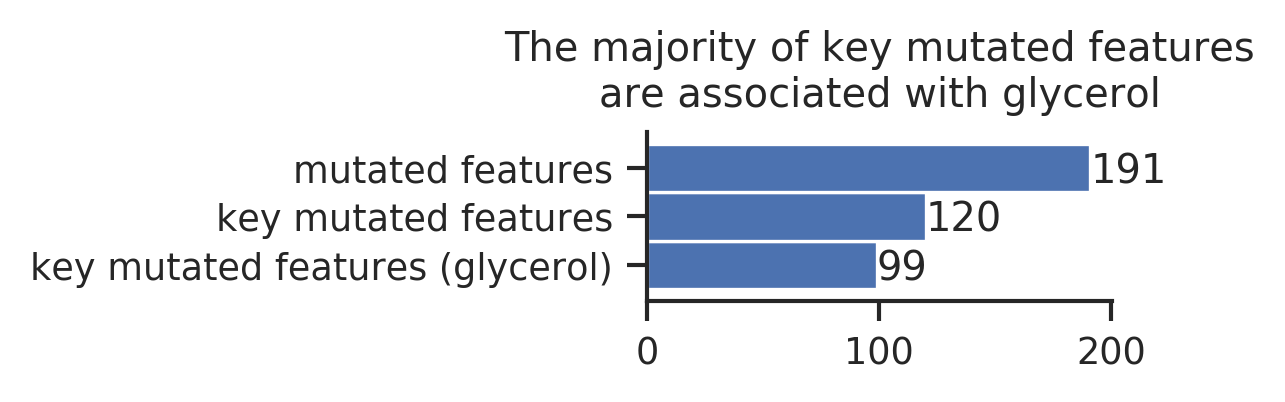

In [127]:
d = {
   "mutated features": 0,
   "key mutated features": 0,
#    glycerol associated mutated features: 0,
   "key mutated features (glycerol)": 0
}
for _, m in muts_df.iterrows():
    for f in m["genomic features"]:
        
        d["mutated features"] += 1
        
        if f["significant"]:
            d["key mutated features"] += 1
            
#         if 'glycerol(2.5)' in f['significantly associated conditions']:
#             d["glycerol associated mutated features] += 1
            
        if 'glycerol(2.5)' in f['significantly associated conditions'] and f["significant"]:
            d["key mutated features (glycerol)"] += 1


df = pd.DataFrame.from_dict(d, orient='index', columns=["count"])
df["proportion"] = df["count"].apply(lambda c: c / d['mutated features'])
display(df)


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")


df = df.sort_values(by="count", ascending=True)

ax = df.plot.barh(
    y="count",
    color="#4C72B0",
    figsize=(2,0.75),
#     figsize=(0.75,2),
    width=1
)

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows(): 
#     s = str(int(r["count"])) +' (%{0:.1f})'.format(r["proportion"] * 100)
    s = str(int(r["count"]))
    ax.text(r["count"], i-0.30,  s)
sns.despine(ax=ax, top=True, right=True)
# ax.set_title("Mutated feature set\nassociated with glycerol\ncontains the majority of key mutations")
ax.set_title("The majority of key mutated features\nare associated with glycerol")
ax.get_legend().remove()
sns.despine(ax=ax, top=True, right=True)
ax.set_ylabel('')
ax.set_xlabel("")